In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.8.0+cu128
False


/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
import numpy as np
import os

data_dir = "/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset"
file_0 = os.path.join(data_dir + "/MWEEG_Subject_4.npz")


In [3]:
sub_0 = np.load(file_0)
print(sub_0.keys())


KeysView(NpzFile '/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset/MWEEG_Subject_4.npz' with keys: EEG, TriggerValues, SampleTime, TriggerTime)


In [4]:
for i in sub_0.files:
    print(i, sub_0[i].shape)

EEG (16, 1019626)
TriggerValues (13,)
SampleTime (1019626,)
TriggerTime (1019626,)


In [5]:
eeg = sub_0['EEG']

triggervalues = sub_0['TriggerValues']
sampletimes = sub_0['SampleTime']
triggertime = sub_0['TriggerTime']
print(eeg.shape)
print(triggervalues.shape)
print(sampletimes.shape)
print(triggertime.shape)
print("eeg min, max, mean:", float(eeg.min()), float(eeg.max()), float(eeg.mean()))
eeg = eeg - eeg.mean(axis = 1, keepdims = True)

(16, 1019626)
(13,)
(1019626,)
(1019626,)
eeg min, max, mean: -127135.1875 78860.4765625 -0.003959251875203771


In [6]:
fs = 1024
n_channels = eeg.shape[0]
ch_names = ["Fpz", "Fp1", "Fp2", "F7", "F8", "F3", "F4", "T7", "T8", "C3", "C4","P7", "P8", "O1", "O2", "Oz"]
ch_types = ["eeg"] * n_channels

Creating RawArray with float64 data, n_channels=16, n_times=1019626
    Range : 0 ... 1019625 =      0.000 ...   995.728 secs
Ready.
<RawArray | 16 x 1019626 (995.7 s), ~124.5 MiB, data loaded>
Using matplotlib as 2D backend.


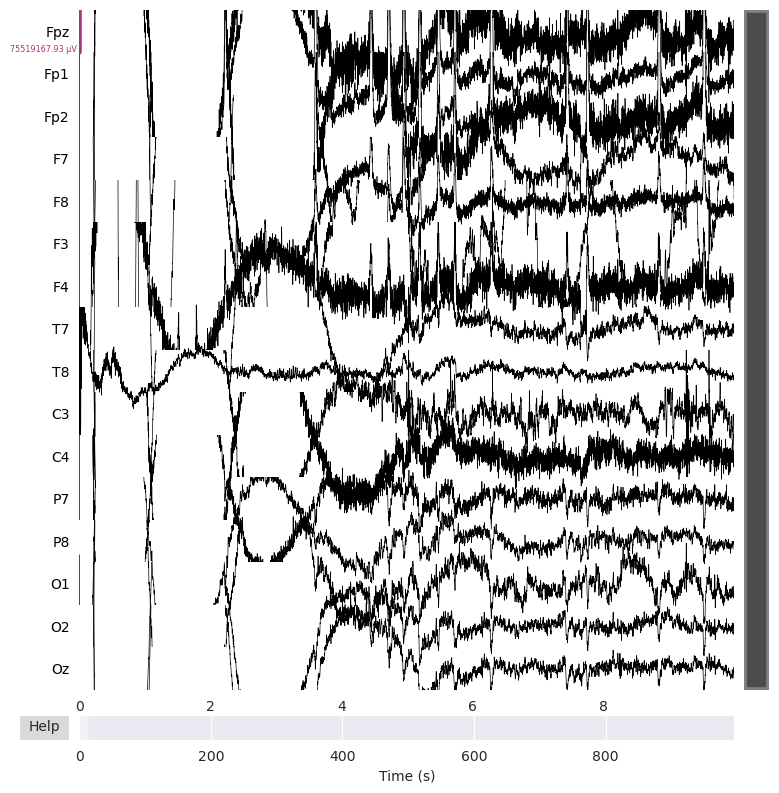

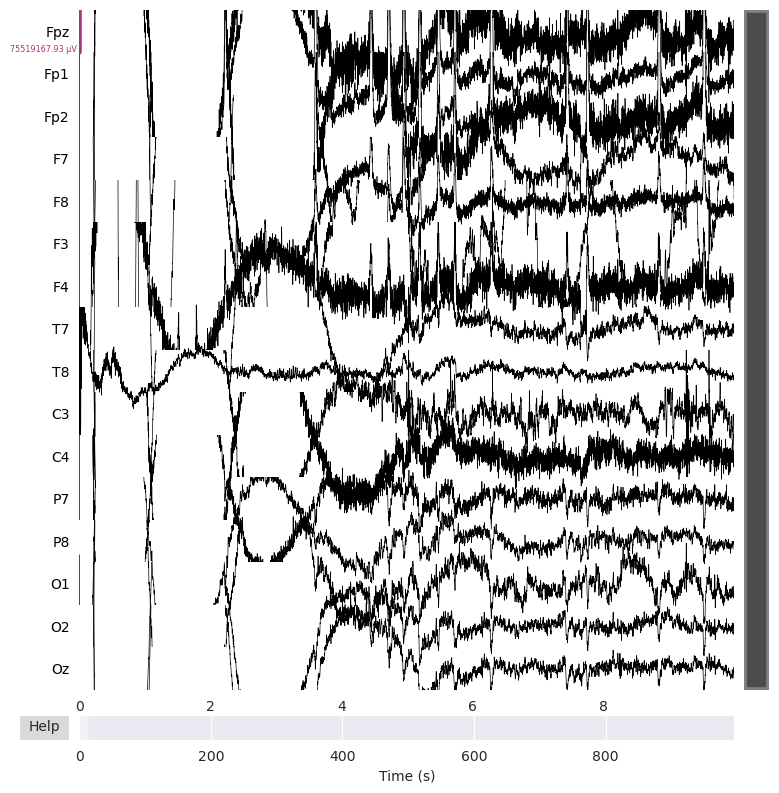

In [7]:
import mne

info = mne.create_info(ch_names, sfreq=fs, ch_types=ch_types)
raw = mne.io.RawArray(eeg, info)
print(raw)
raw.plot(title="EEG Signals", scalings='auto')

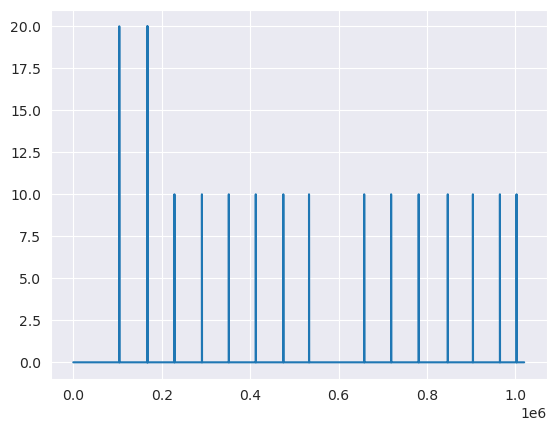

In [8]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(triggertime))], triggertime)
plt.show()
# print(triggertime)

In [9]:
# Find all nonzero indices (trigger points)
trigger_indices = np.where(triggertime != 0)[0]
print("Detected trigger indices:", trigger_indices.shape)

n = min(len(trigger_indices), len(triggervalues))
trigger_indices2 = trigger_indices[:n]
triggervalues2 = triggervalues[:n]
trigger_indices2

Detected trigger indices: (16,)


array([104048, 167088, 168232, 228784, 290920, 351728, 412704, 474960,
       533096, 657865, 718737, 781105, 846857])

In [10]:
min(len(trigger_indices), len(triggervalues))

13

In [11]:
print(n, len(trigger_indices2))

13 13


In [12]:
trigger_indices2.shape

(13,)

In [13]:
trigger_indices2.shape

(13,)

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_68624/2819079179.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax = 100).plot()
/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


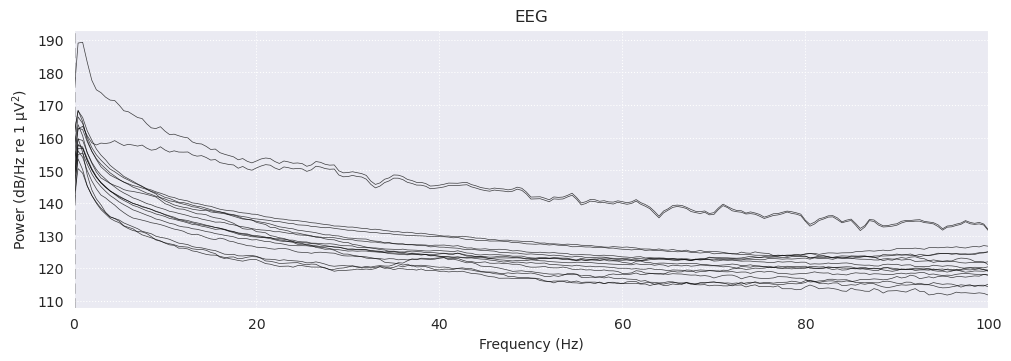

In [14]:
raw.compute_psd(fmax = 100).plot()

In [15]:
trigger_indices2.shape

(13,)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (3.302 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge

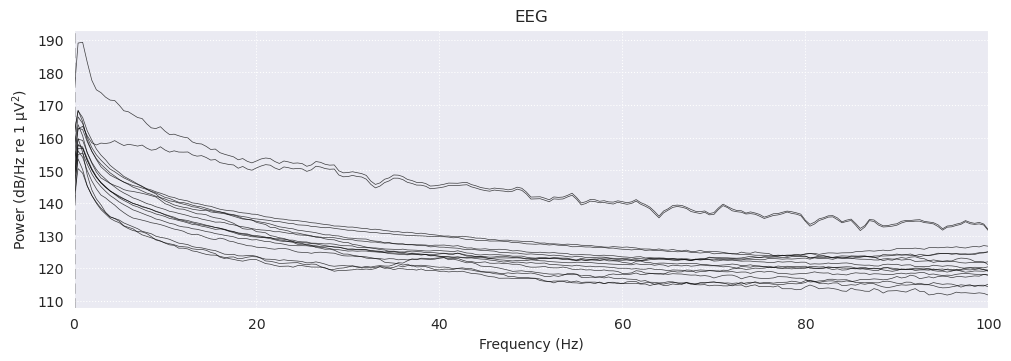

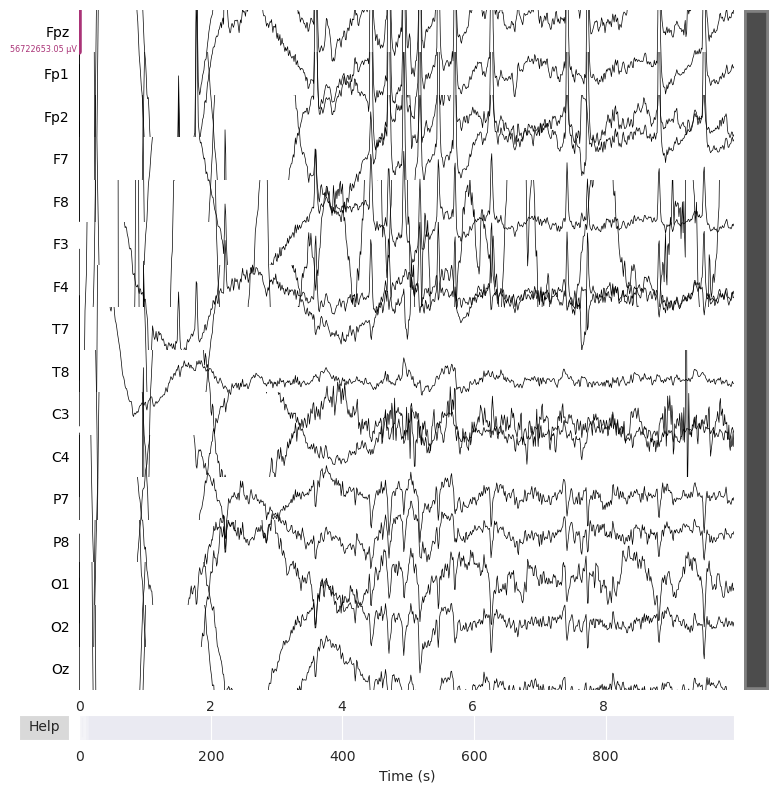

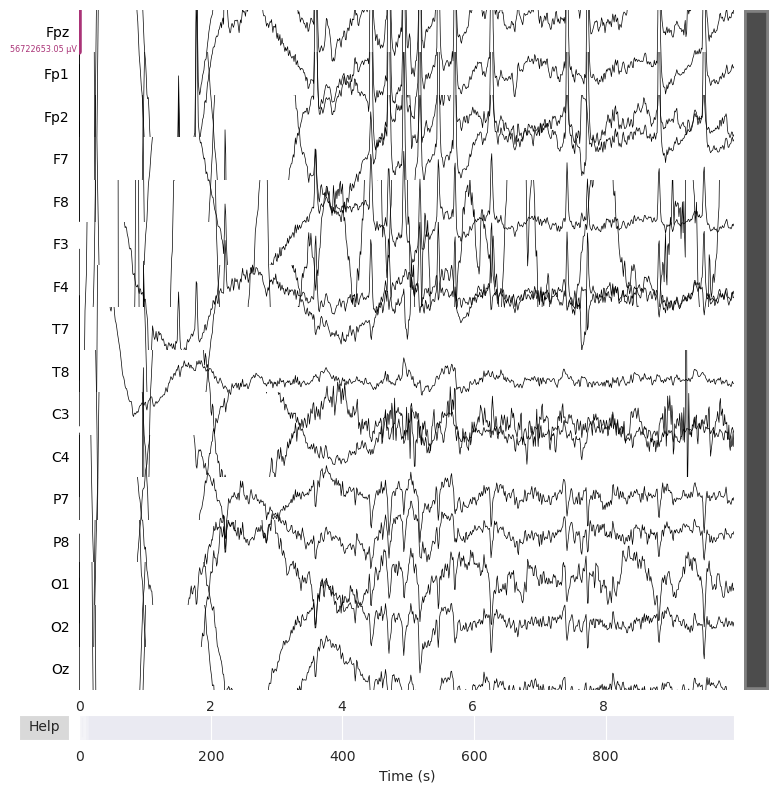

In [16]:
raw.filter(1, 30)  # will keep 1-40 hz
raw.notch_filter(freqs=50) # power line noise ka interference hai ye
raw.plot(title="Filtered EEG", scalings='auto')


In [17]:
trigger_indices2.shape

(13,)

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_68624/2819079179.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax = 100).plot()
/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


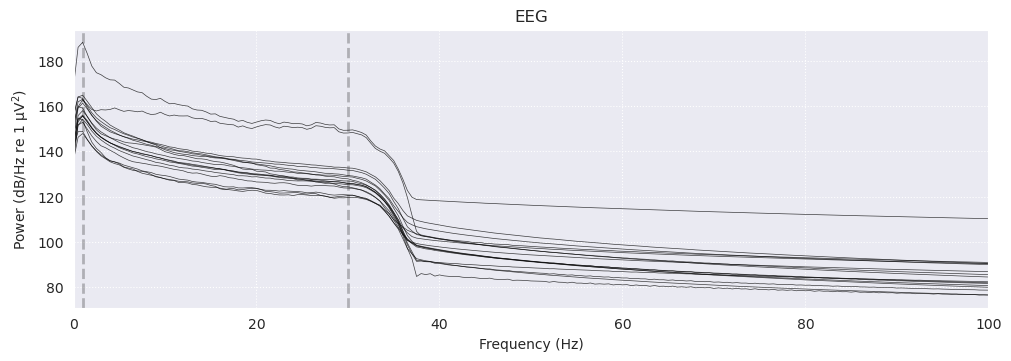

In [18]:
raw.compute_psd(fmax = 100).plot()

In [19]:
trigger_indices2.shape

(13,)

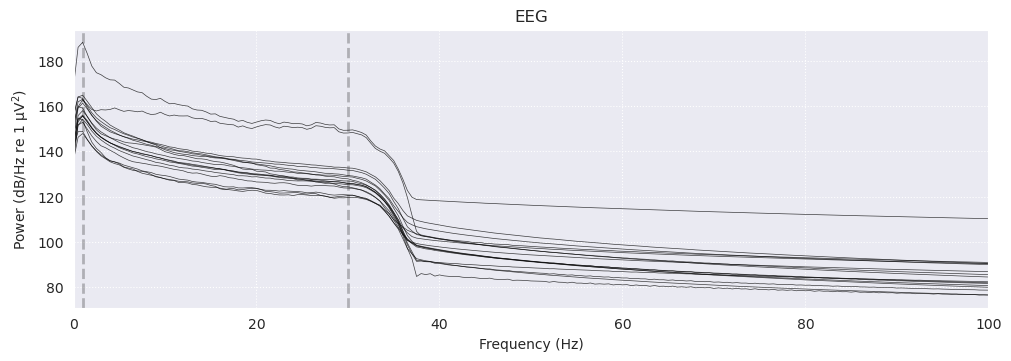

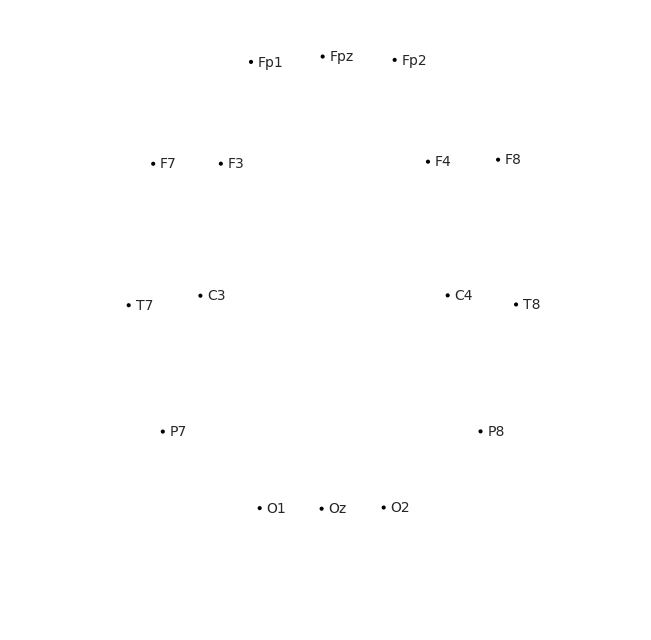

In [20]:
# Set the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# You can now plot the sensor locations to verify they are correct
raw.plot_sensors(ch_type='eeg', show_names=True)
plt.show()

In [21]:
trigger_indices2.shape

(13,)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 7.3s.


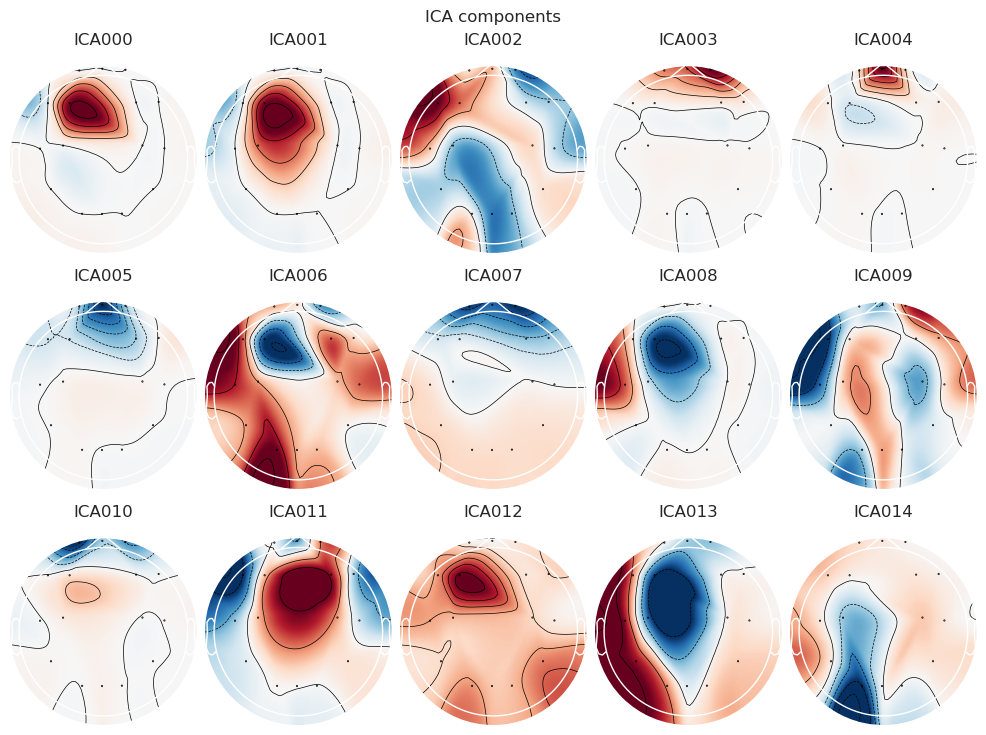

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components


In [22]:
ica = mne.preprocessing.ICA(n_components=15, random_state=2)
ica.fit(raw)
ica.plot_components()  # visually select components to remove
ica.exclude = [0, 1]   # example: components causing blink/muscle artifact
raw = ica.apply(raw)


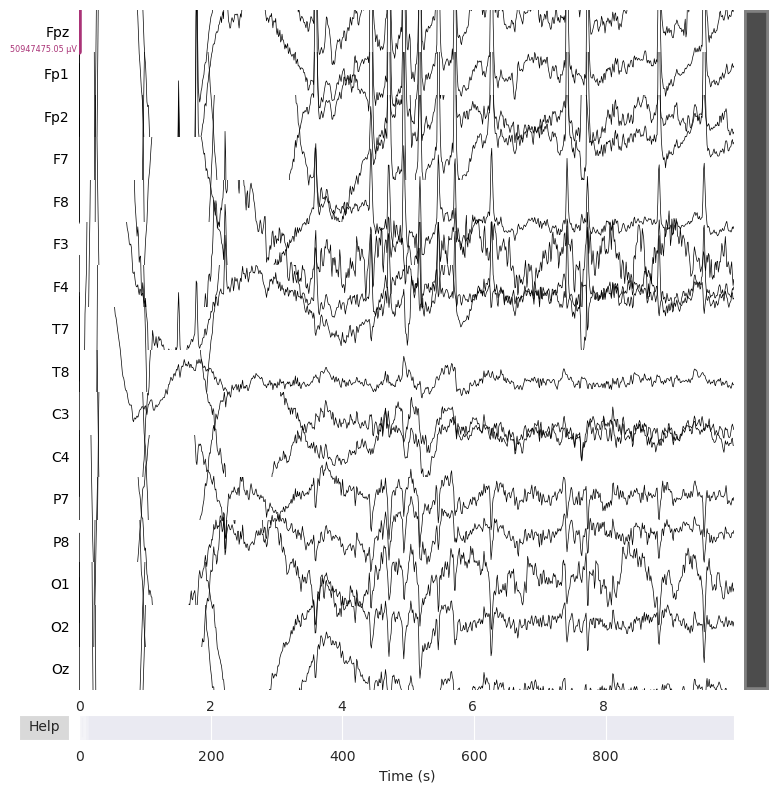

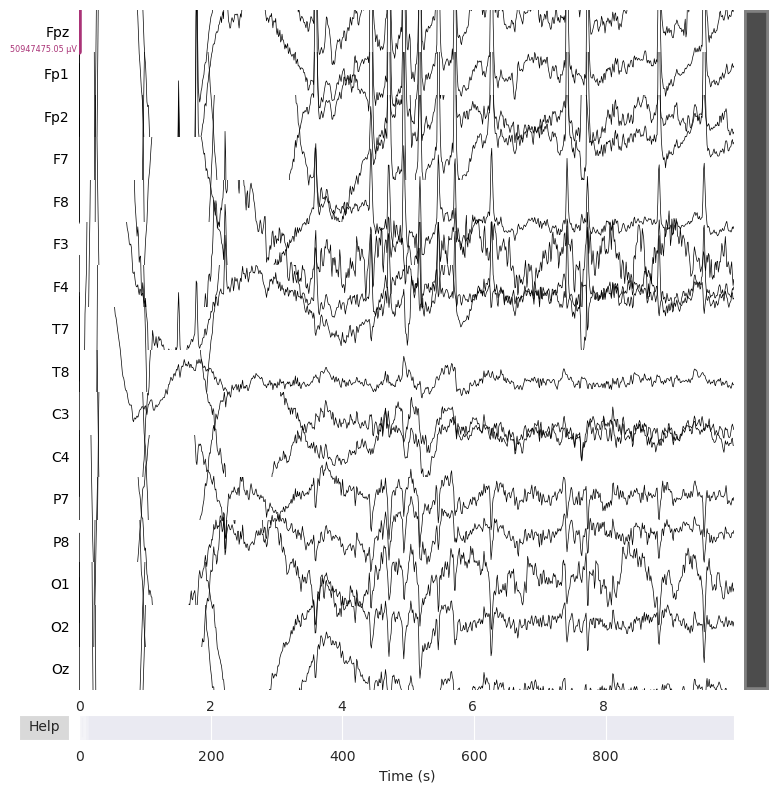

In [23]:
raw.plot(title="Filtered EEG", scalings='auto')

In [24]:
raw.set_eeg_reference('average', projection=True)


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawArray | 16 x 1019626 (995.7 s), ~124.5 MiB, data loaded>

In [25]:
# Map triggers

events = np.column_stack((trigger_indices2, np.zeros(len(trigger_indices2), dtype=int), triggervalues2.astype(int)))
tmin = -15.0
tmax = 0.0
# Create epochs around events (-0.2 to 0.8 sec)
epochs = mne.Epochs(raw, events, event_id=None, tmin=tmin, tmax=tmax, baseline=(None,0), preload=True)


Not setting metadata
13 matching events found
Setting baseline interval to [-15.0, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 15361 original time points ...
0 bad epochs dropped


In [26]:
# Duration of mini-epochs
# Note: I've updated tmin/tmax to match the values from your previous code (-0.2 to 0.8)

re_epoch_dur = 3  # seconds
n_splits = int((tmax - tmin) / re_epoch_dur)

# Generate new start times for the mini-epochs
start_times = np.arange(tmin, tmax, re_epoch_dur)

# Store new epochs and labels
mini_epochs_list = []
labels_list = []

# Iterate through the INDICES of the epochs object
for ep_idx in range(len(epochs)):
    # Get the full MNE Epochs object for the current trial
    parent_epoch = epochs[ep_idx]

    for s in start_times:
        # Now, crop the MNE object, which has the .crop() method
        mini_epoch = parent_epoch.copy().crop(tmin=s, tmax=s + re_epoch_dur)

        # Get data returns shape (1, n_channels, n_times), which is what you want
        mini_epochs_list.append(mini_epoch.get_data())

        # Append the corresponding label
        labels_list.append(epochs.events[ep_idx, 2])

# Combine into one big array for machine learning
mini_epochs = np.concatenate(mini_epochs_list, axis=0)
labels = np.array(labels_list)

print("Shape of mini-epochs array:", mini_epochs.shape)
print("Shape of labels array:", labels.shape)

Shape of mini-epochs array: (65, 16, 3073)
Shape of labels array: (65,)


In [27]:
info = raw.info.copy()
epochs_3s = mne.EpochsArray(mini_epochs, info, events=np.c_[np.arange(len(labels)), np.zeros(len(labels), int), labels])


Not setting metadata
65 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [43]:
from autoreject import AutoReject

# Assuming mini_epochs and labels are numpy arrays
mini_info = mne.create_info(ch_names=ch_names,
                            sfreq=fs,
                            ch_types=['eeg']*len(ch_names))

n_mini_epochs = len(mini_epochs)
mini_events = np.column_stack((np.arange(n_mini_epochs),
                               np.zeros(n_mini_epochs, dtype=int),
                               labels))

mini_epochs_mne = mne.EpochsArray(mini_epochs, info=mini_info, events=mini_events, tmin=0)

# --- Set montage for valid channel positions ---
montage = mne.channels.make_standard_montage('standard_1020')
mini_epochs_mne.set_montage(montage)

# --- AutoReject ---
ar = AutoReject(n_jobs=-1, verbose='tqdm')
mini_epochs_clean_mne = ar.fit_transform(mini_epochs_mne)

# Extract clean data and labels
X_clean = mini_epochs_clean_mne.get_data()
labels_clean = mini_epochs_clean_mne.events[:, 2]

print("Clean mini-epochs shape:", X_clean.shape)
print("Clean labels shape:", labels_clean.shape)


Not setting metadata
65 matching events found
No baseline correction applied
0 projection items activated


/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running autoreject on ch_type=eeg


100%|██████████| Creating augmented epochs : 16/16 [00:00<00:00,  155.72it/s]
100%|██████████| Computing thresholds ... : 16/16 [00:00<00:00,  345.91it/s]


  0%|          | Repairing epochs : 0/65 [00:00<?,       ?it/s]

  6%|▌         | Repairing epochs : 4/65 [00:00<00:00,  232.80it/s]

 12%|█▏        | Repairing epochs : 8/65 [00:00<00:00,  239.40it/s]

 18%|█▊        | Repairing epochs : 12/65 [00:00<00:00,  239.35it/s]

 25%|██▍       | Repairing epochs : 16/65 [00:00<00:00,  236.67it/s]

 31%|███       | Repairing epochs : 20/65 [00:00<00:00,  235.19it/s]

 37%|███▋      | Repairing epochs : 24/65 [00:00<00:00,  236.15it/s]

 43%|████▎     | Repairing epochs : 28/65 [00:00<00:00,  237.16it/s]

 51%|█████     | Repairing epochs : 33/65 [00:00<00:00,  241.43it/s]

 58%|█████▊    | Repairing epochs : 38/65 [00:00<00:00,  245.12it/s]

 66%|██████▌   | Repairing epochs : 43/65 [00:00<00:00,  248.27it/s]

 74%|███████▍  | Repairing epochs : 48/65 [00:00<00:00,  250.88it/s]

 82%|█████





Estimated consensus=0.70 and n_interpolate=4




  0%|          | Repairing epochs : 0/65 [00:00<?,       ?it/s]

  3%|▎         | Repairing epochs : 2/65 [00:00<00:00,  120.65it/s]

  8%|▊         | Repairing epochs : 5/65 [00:00<00:00,  148.57it/s]

 12%|█▏        | Repairing epochs : 8/65 [00:00<00:00,  160.41it/s]

 18%|█▊        | Repairing epochs : 12/65 [00:00<00:00,  172.63it/s]

 25%|██▍       | Repairing epochs : 16/65 [00:00<00:00,  179.29it/s]

 31%|███       | Repairing epochs : 20/65 [00:00<00:00,  183.24it/s]

 37%|███▋      | Repairing epochs : 24/65 [00:00<00:00,  185.71it/s]

 43%|████▎     | Repairing epochs : 28/65 [00:00<00:00,  188.73it/s]

 49%|████▉     | Repairing epochs : 32/65 [00:00<00:00,  190.65it/s]

 54%|█████▍    | Repairing epochs : 35/65 [00:00<00:00,  181.92it/s]

 58%|█████▊    | Repairing epochs : 38/65 [00:00<00:00,  179.34it/s]

 65%|██████▍   | Repairing epochs : 42/65 [00:00<00:00,  181.10it/s]

 69%|██████▉   | Repairing epochs : 45/65 [00:00<00:00,  181.32it/s]

 75%|███████▌  | Repairing

Dropped 6 epochs: 0, 1, 28, 29, 31, 64
Clean mini-epochs shape: (59, 16, 3073)
Clean labels shape: (59,)


UniqueCountsResult(values=array([1, 2]), counts=array([44, 15]))

(59, 16, 3073)